In [1]:
%run init.ipy
from dgf import core
from dgf import isokernels
from dgf import constants
from dgf.prior import lf
from dgf.prior import source
from lib import lfmodel
from lib import klatt

import datatable as dt
from datatable import f, by, update
import scipy.stats

fs = 10
rng = np.random.default_rng(41587)

In [2]:
lf_samples = source.get_lf_samples()

[Memory]8.2s, 0.1min    : Loading get_lf_samples...


In [3]:
def plot_dgf(i):
    s = lf_samples[i]

    p, t, u, log_prob_u = s['p'], s['t'], s['u'], s['log_prob_u']
    dt = t[1] - t[0]
    plot(t, cumsum(u)*dt)
    xlabel('time [msec]')
    title(f'log prob = {log_prob_u:.1f}');
    show()
    
def sample_analytical_source():
    plot_dgf(randint(len(lf_samples)))
    
def sample_nonparametric_source(impose_null_integral=True):
    T = 7.
    N = 300
    M = 128
    c = 2.25
    L = T*c
    t, dt = jnp.linspace(-1., T+3, N, retstep=True)

    kernel = isokernels.Matern32Kernel
    var = 0.5
    r = 1/np.pi*2
    scale = r*T
    
    oq = 1 - rand()*.7

    Ru = core.kernelmatrix_root_gfd_oq(kernel, var, scale, t, M, T, oq, c, impose_null_integral=impose_null_integral)

    a = randn(M)
    plot(t, cumsum(Ru @ a)*dt*10);
    
    log_prob_p = np.sum(scipy.stats.norm.logpdf(a))
    
    title(f'log prob = {log_prob_p:.1f}');
    xlabel('time [msec]')
    show()

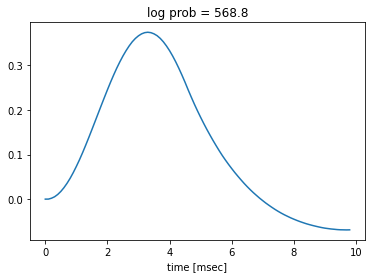

In [11]:
sample_analytical_source()

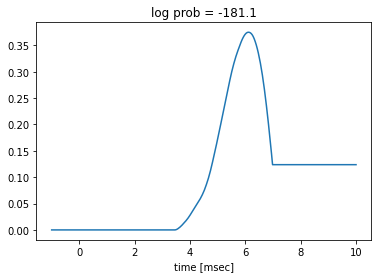

In [40]:
sample_nonparametric_source(impose_null_integral=False) # Constraint = 3 bans => have to run this cell 1000 times to get one with null integral